In [2]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt

from statsmodels.tsa.seasonal import seasonal_decompose

In [3]:
df = pd.read_csv('iklim_sulut.csv')
df.date = pd.to_datetime(df.date, format='%Y-%m-%d')
df.set_index('date', inplace=True)

In [4]:
df.head()

,min_temp,max_temp,avg_temp,avg_humidity,rainfall,sunshine
date,,,,,,
2016-01-01,19.0,27.6,24.1,85.0,NaN,4.1
2016-01-02,20.0,28.0,23.2,89.0,8888.0,8.6
2016-01-03,21.0,27.9,23.7,84.0,NaN,8.4
2016-01-04,20.0,27.4,22.5,89.0,9.0,3.3
2016-01-05,18.0,27.0,21.4,93.0,34.5,3.5


# Checking Function

In [5]:
def check_missing(column, title=False):
    plt.figure(figsize=(16,1))
    plt.title(title)
    plt.plot(column.isna())
    plt.figure(figsize=(16,6))
    plt.plot(column)
    print(f'total missing data : {column.isna().sum()}')

# Fill Missing Value with Mean

In [6]:
def fill_mean(column, start=None):
    if (start == None):
        for index, row in df.iterrows():
            if math.isnan(df.loc[index, column]):
                df.loc[index, column] = round(df[column].mean(),1)
    else:
        for index, row in df.iterrows():
            if index >= pd.Timestamp(start):
                if math.isnan(df.loc[index, column]):
                    df.loc[index, column] = round(df[column].mean(),1)

total missing data : 35


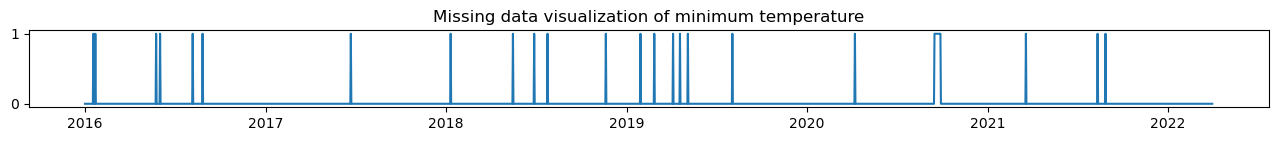

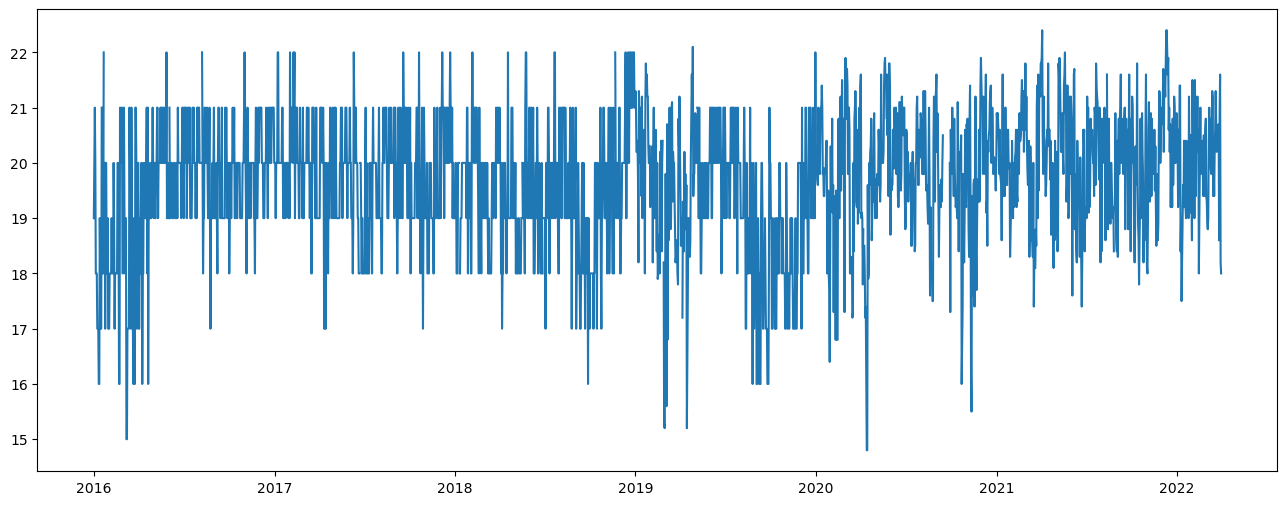

In [7]:
check_missing(df.min_temp, 'Missing data visualization of minimum temperature')

In [ ]:
fill_mean('min_temp')

In [ ]:
check_missing(df.min_temp)

total missing data : 22


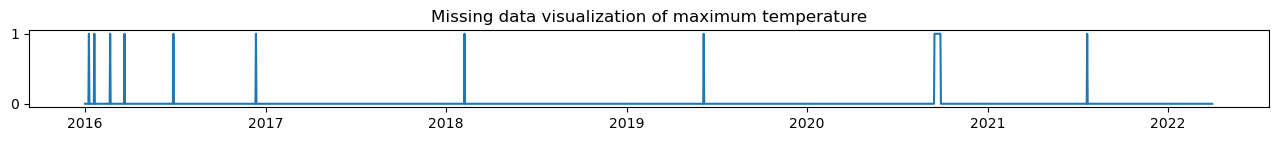

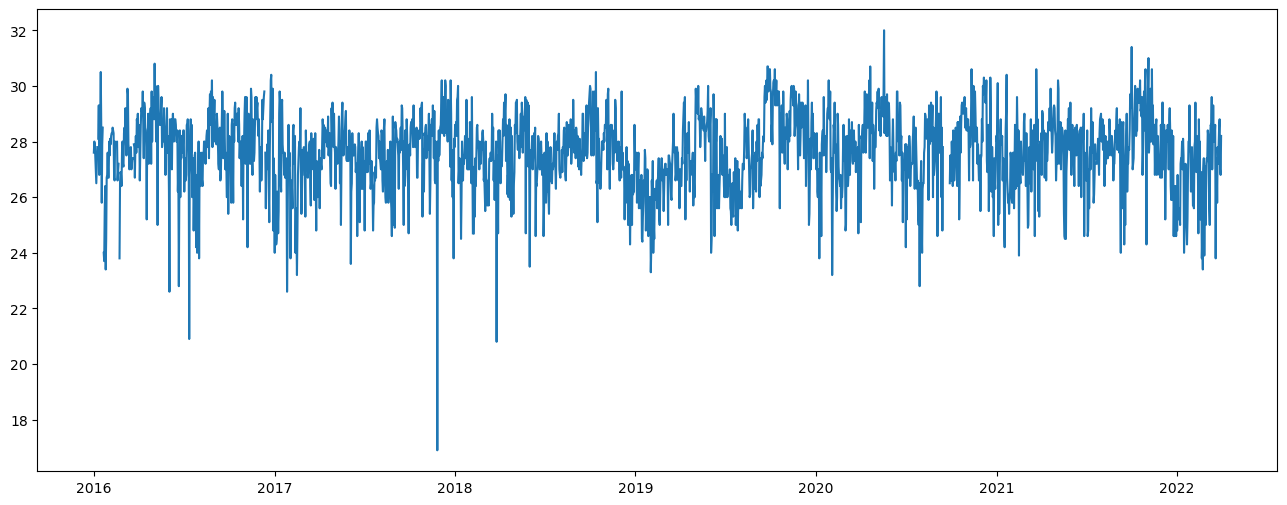

In [8]:
check_missing(df.max_temp, 'Missing data visualization of maximum temperature')

In [ ]:
fill_mean('max_temp')

In [ ]:
check_missing(df.max_temp)

In [ ]:
check_missing(df.avg_temp.loc['2018-01-01':], 'Visualisasi missing data temperatur rata - rata diatas tahun 2018')

total missing data : 662


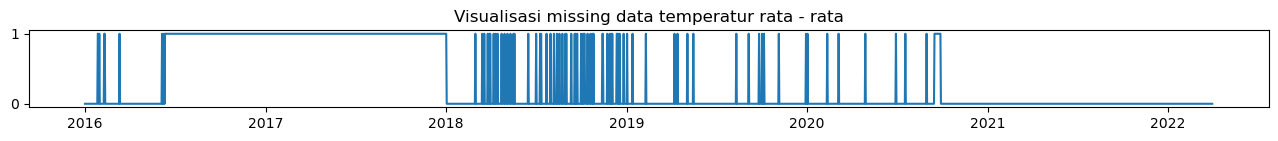

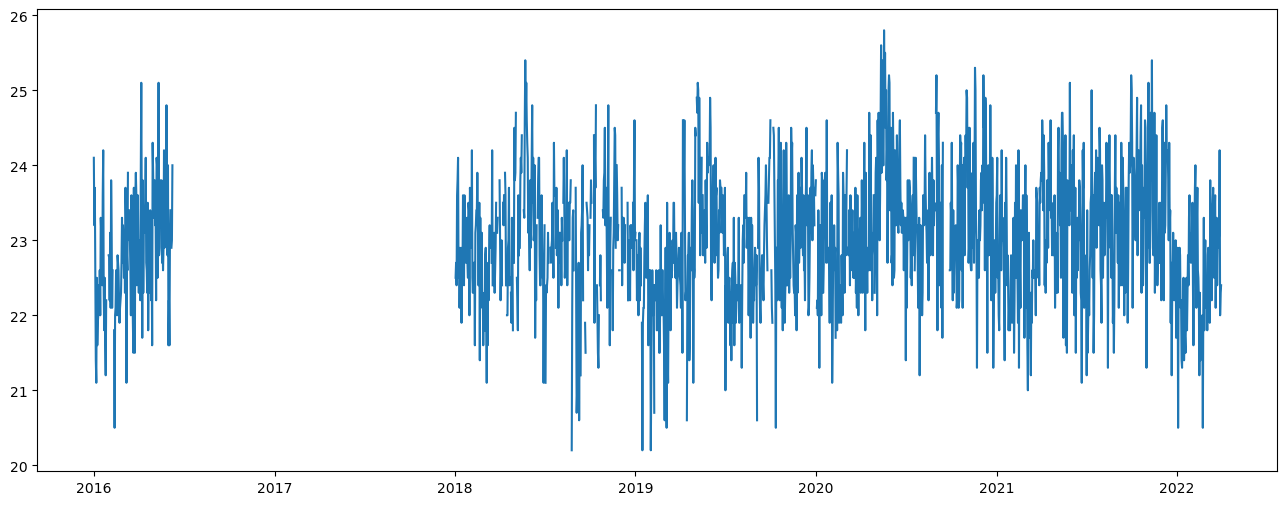

In [9]:
check_missing(df.avg_temp, 'Visualisasi missing data temperatur rata - rata')

In [ ]:
df.loc['2018-01-01':, 'avg_temp']

In [ ]:
fill_mean('avg_temp', '2018-01-01')

In [ ]:
check_missing(df.avg_temp)

In [ ]:
df.loc['2018-01-01':, 'avg_temp']

In [ ]:
check_missing(df.avg_humidity, 'Visualisasi missing data kelembapan rata - rata')

In [ ]:
check_missing(df.avg_humidity.loc['2018-01-01':], 'Visualisasi missing data kelembapan rata - rata diatas tahun 2018')

In [ ]:
df.loc['2018-01-01':, 'avg_humidity']

In [ ]:
fill_mean('avg_humidity', '2018-01-01')

In [ ]:
check_missing(df.avg_humidity)

total missing data : 29


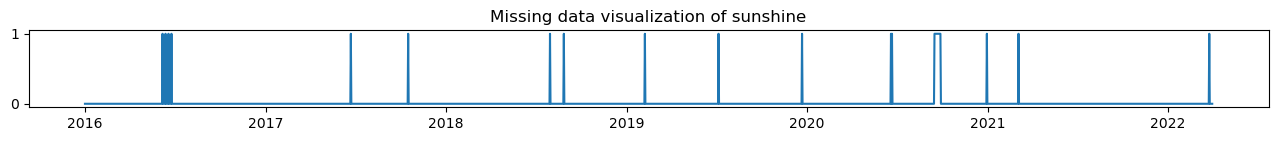

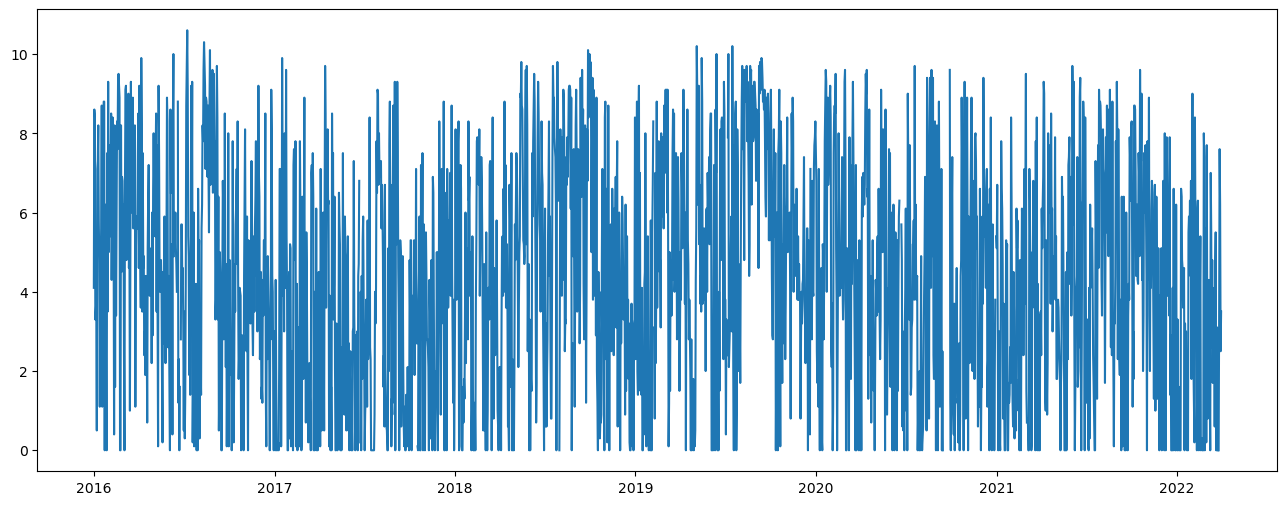

In [8]:
check_missing(df.sunshine, 'Missing data visualization of sunshine')

In [ ]:
fill_mean('sunshine')

In [ ]:
check_missing(df.sunshine)

In [ ]:
check_missing(df.rainfall, 'Visualisasi missing data curah hujan')

In [ ]:
for index, row in df.iterrows():
    if df.loc[index, 'rainfall'] == 8888:
        df.loc[index, 'rainfall'] = None

In [ ]:
check_missing(df.rainfall, 'Visualisasi missing data curah hujan')

In [ ]:
plt.figure(figsize=(12,4))
plt.plot(df.rainfall['2021-01-01':'2021-06-01'])
plt.figure(figsize=(12,4))
plt.plot(df.rainfall['2020-01-01':'2020-06-01'])

In [ ]:
df

In [ ]:
df.tail()